# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 - Kushal D**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [42]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [43]:
# Import Libraries
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

### Dataset Loading

In [21]:
# Load Dataset
ROOT_DIR = Path.cwd()
DATASET_DIR = ROOT_DIR/"Dataset"
titles_df = pd.read_csv(DATASET_DIR/"titles.csv")
credits_df=pd.read_csv(DATASET_DIR/"credits.csv")

### Dataset First View

In [22]:
# Dataset First Look
print("First 5 rows of Titles Dataset:")
print(titles_df.head())
print("\nFirst 5 rows of Credits Dataset:")
print(credits_df.head())

First 5 rows of Titles Dataset:
        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genres 

### Dataset Rows & Columns count

In [23]:
# Dataset Rows & Columns count
print("Titles Dataset Shape (Rows, Columns):", titles_df.shape)
print("Credits Dataset Shape (Rows, Columns):", credits_df.shape)

Titles Dataset Shape (Rows, Columns): (9871, 15)
Credits Dataset Shape (Rows, Columns): (124235, 5)


### Dataset Information

In [24]:
# Dataset Info
print("\nTitles Dataset Information:")
titles_df.info()


Titles Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float

In [25]:
#Credit Dataset info
print("\nCredits Dataset Information:")
credits_df.info()


Credits Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


#### Duplicate Values

In [26]:
# Dataset Duplicate Value Count
#count duplicates in Titles dataset
titles_duplicates = titles_df.duplicated().sum()
#count duplicated in Credits dataset
credits_duplicates = credits_df.duplicated().sum()
#display
print("Titles Dataset Duplicate Rows:", titles_duplicates)
print("Credits Dataset Duplicate Rows:", credits_duplicates)

Titles Dataset Duplicate Rows: 3
Credits Dataset Duplicate Rows: 56


#### Missing Values/Null Values

In [27]:
# Missing Values/Null Values Count
#missing value count for titles dataset
titles_missing_count = titles_df.isnull().sum()
print("missing value count for titles\n",titles_missing_count)

missing value count for titles
 id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64


In [28]:
#missing value count for credits dataset
credits_missing_count = credits_df.isnull().sum()
print("missing value count for credits\n",credits_missing_count)

missing value count for credits
 person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


In [29]:
#missing value percentage for titles dataset
titles_missing_percent=(titles_missing_count/len(titles_df))*100
print("Titles Dataset")
print(titles_missing_percent.round(2))

Titles Dataset
id                       0.00
title                    0.00
type                     0.00
description              1.21
release_year             0.00
age_certification       65.72
runtime                  0.00
genres                   0.00
production_countries     0.00
seasons                 86.25
imdb_id                  6.76
imdb_score              10.34
imdb_votes              10.44
tmdb_popularity          5.54
tmdb_score              21.09
dtype: float64


In [30]:
#missing value percentage for credits dataset
print("Credits dataset")
credits_missing_percent=(credits_missing_count/len(credits_df))*100
print(credits_missing_percent.round(2))

Credits dataset
person_id     0.00
id            0.00
name          0.00
character    13.11
role          0.00
dtype: float64


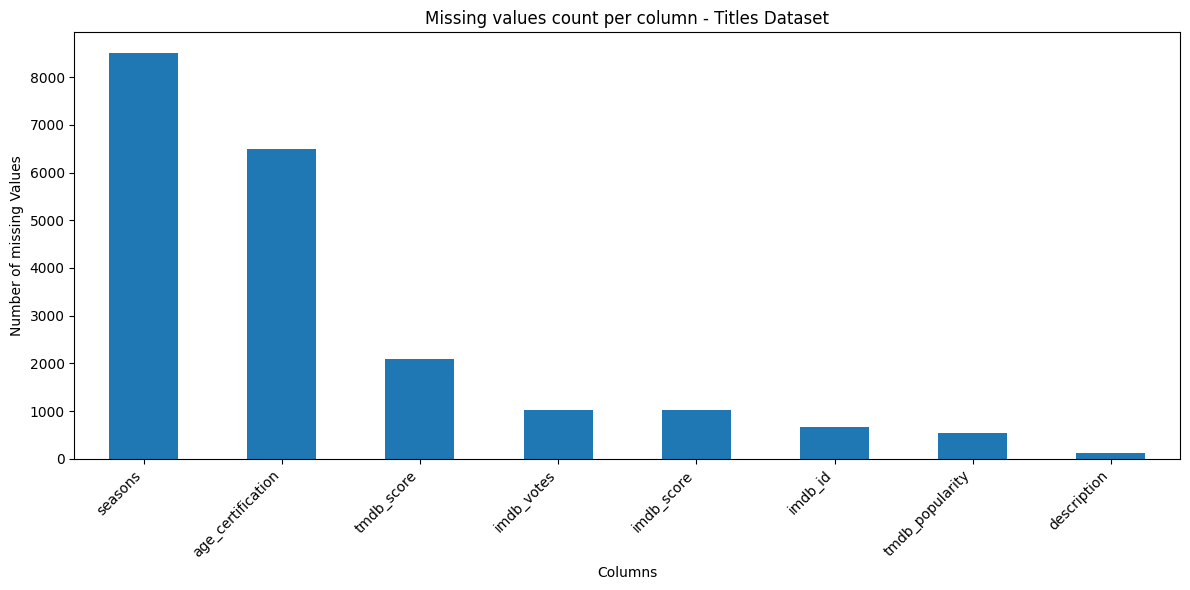

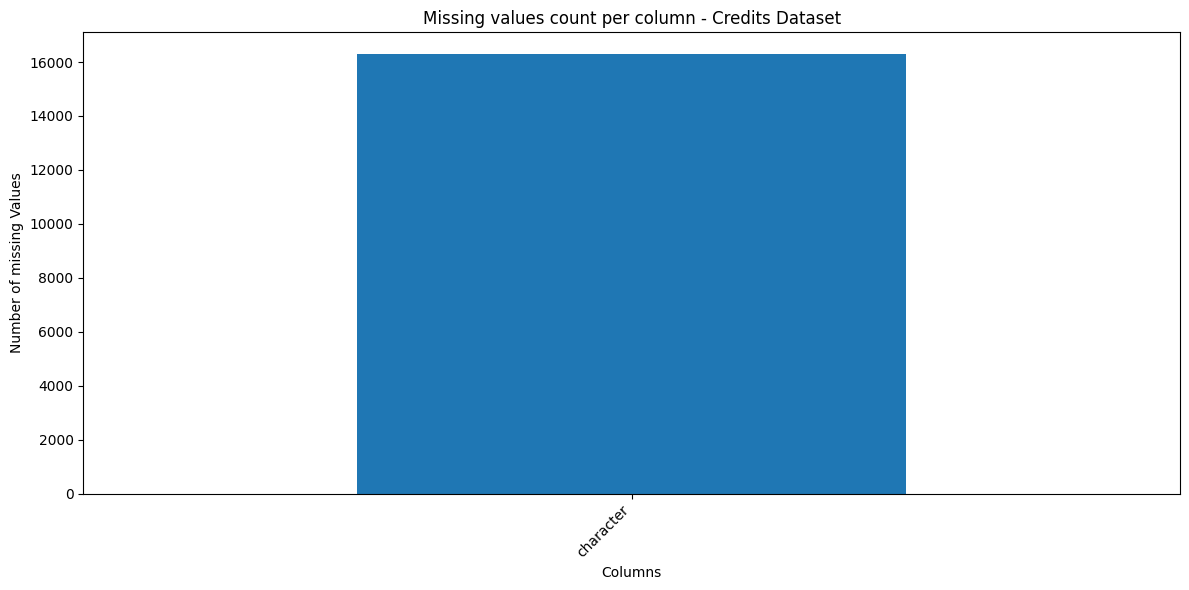

In [31]:
# Visualizing the missing values (Bar  plot)
#titles Dataset
plt.figure(figsize=(12,6))
titles_missing_count[titles_missing_count>0].sort_values(ascending=False).plot(kind='bar')
plt.title("Missing values count per column - Titles Dataset")
plt.xlabel("Columns")
plt.ylabel("Number of missing Values")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

#Credits Dataset
plt.figure(figsize=(12,6))
credits_missing_count[credits_missing_count>0].sort_values(ascending=False).plot(kind='bar')
plt.title("Missing values count per column - Credits Dataset")
plt.xlabel("Columns")
plt.ylabel("Number of missing Values")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

### What did you know about your dataset?

We have two well-structured and interrelated datasets: a Titles dataset with 9871 records and 15 attributes and a credits dataset with 124235 records and 5 attributes, together representing the complete catalog of movies and TV shows along with their cast and crew information. The titles dataset contains rich metadata such as content type, genres,release year, runtime, production countries, IMDb and TMDB ratings and popularity metrics, with no missing values in key identifier fields like title, type, genres and release year, indicating strong data reliability. While some columns show high missing values such as seasons (86.25%) and age certification (65.72 %) these are contextually valif, as movies do not have seasons and older or international content may lack certication. Moderate missing values in ratin grelated attributes reflect incomplete external data rather than data quality issues.The credits dataset shows missing valuesonly in the character clumn (13.11%) which is to be expecteds since directors do not potray characters. Duplicate records are minimal in both the datasets and do not significantly affect analysis.

## ***2. Understanding Your Variables***

In [32]:
# Dataset Columns
#titles dataset column names
print("Titles Dataset Columns")
for col in titles_df.columns:
    print("-",col)
#credits dataset column names
print("\nCredits dataset columns")
for col in credits_df.columns:
    print("-",col)


Titles Dataset Columns
- id
- title
- type
- description
- release_year
- age_certification
- runtime
- genres
- production_countries
- seasons
- imdb_id
- imdb_score
- imdb_votes
- tmdb_popularity
- tmdb_score

Credits dataset columns
- person_id
- id
- name
- character
- role


In [33]:
# Dataset Describe
#Titles dataset summary
print("Titles dataset - summary")
titles_df.describe()

Titles dataset - summary


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [34]:
#Credit dataset summary
print("Credits dataset - summary")
credits_df.describe()

Credits dataset - summary


,person_id
count,1.242350e+05
mean,4.064737e+05
std,5.616296e+05
min,1.000000e+00
25%,3.899200e+04
50%,1.339490e+05
75%,5.712560e+05
max,2.371153e+06


### Variables Description

The titles dataset containes key metadata describing each move or TV show, including unique identifies, descriptive attributes, content classification, temporal and structural details, and audience enagement metrics. The statistical summary indiates wide temporal coverage (1912-2022), high variability in population and vote counts, and meaningful dispersion in ratings, reflecting diverse audience reception. The Credits dataset complements this by capturing contributor-level information through person-id linking individual to titles, specifying names, roles and character potrayals, therby enabling analysis of cast and creww invlovement acrosee the content library

### Check Unique Values for each variable.

In [35]:
# Check Unique Values for each variable.
titles_unique_df = pd.DataFrame({
    "Column": titles_df.columns,
    "Unique_Values": [titles_df[col].nunique() for col in titles_df.columns]
})
print("\nTitles Dataset - Unique Values Summary")
print(titles_unique_df)

# Create unique count table for Credits dataset
credits_unique_df = pd.DataFrame({
    "Column": credits_df.columns,
    "Unique_Values": [credits_df[col].nunique() for col in credits_df.columns]
})
print("\nCredits Dataset - Unique Values Summary")
print(credits_unique_df)


Titles Dataset - Unique Values Summary
                  Column  Unique_Values
0                     id           9868
1                  title           9737
2                   type              2
3            description           9734
4           release_year            110
5      age_certification             11
6                runtime            207
7                 genres           2028
8   production_countries            497
9                seasons             32
10               imdb_id           9201
11            imdb_score             86
12            imdb_votes           3650
13       tmdb_popularity           5325
14            tmdb_score             89

Credits Dataset - Unique Values Summary
      Column  Unique_Values
0  person_id          80508
1         id           8861
2       name          79758
3  character          71097
4       role              2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
class TitlesDataWrangler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df = X.copy()
        # Remove duplicates
        df = df.drop_duplicates()
        # Handle missing values
        df['seasons'] = df['seasons'].fillna(0)
        df['age_certification'] = df['age_certification'].fillna('Not Rated')
        df['imdb_score'] = df['imdb_score'].fillna(df['imdb_score'].median())
        df['tmdb_score'] = df['tmdb_score'].fillna(df['tmdb_score'].median())
        df['imdb_votes'] = df['imdb_votes'].fillna(0)
        df['tmdb_popularity'] = df['tmdb_popularity'].fillna(0)
        df['imdb_id'] = df['imdb_id'].fillna('Unknown')
        df['description'] = df['description'].fillna('Description not available')
        # Data type corrections
        df['seasons'] = df['seasons'].astype(int)
        df['release_year'] = df['release_year'].astype(int)
        return df

In [ ]:
class CreditsDataWrangler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df = X.copy()
        # Remove duplicates
        df = df.drop_duplicates()
        # Handle missing values
        df['character'] = df['character'].fillna('Not Applicable')
        return df

In [39]:
# Pipeline for Titles dataset
titles_pipeline = Pipeline(steps=[
    ('titles_wrangling', TitlesDataWrangler())
])
# Pipeline for Credits dataset
credits_pipeline = Pipeline(steps=[
    ('credits_wrangling', CreditsDataWrangler())
])

In [41]:
# Apply wrangling pipelines
titles_df_clean = titles_pipeline.fit_transform(titles_df)
credits_df_clean = credits_pipeline.fit_transform(credits_df)
# Final verification
print("Final Titles Dataset Info:")
print(titles_df_clean.info())
print("\nFinal Credits Dataset Info:")
print(credits_df_clean.info())

Final Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9868 non-null   object 
 4   release_year          9868 non-null   int64  
 5   age_certification     9868 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9868 non-null   object 
 8   production_countries  9868 non-null   object 
 9   seasons               9868 non-null   int64  
 10  imdb_id               9868 non-null   object 
 11  imdb_score            9868 non-null   float64
 12  imdb_votes            9868 non-null   float64
 13  tmdb_popularity       9868 non-null   float64
 14  tmdb_score            9868 non-null   float64
dtyp

### What all manipulations have you done and insights you found?

The dataset was cleaned and prepared through several data wrangling steps. Duplicate records were removed from both the titles and credits datasets to avoid biased counts. Missing values were handled contextually: seasons was set to 0 for movies, age_certification was filled as Not Rated, missing ratings (imdb_score, tmdb_score) were imputed using median values, popularity and vote counts were set to 0 where unavailable, and textual fields such as description and imdb_id were standardized. In the credits dataset, missing character values were labeled Not Applicable to account for directors. Data types were also standardized to ensure consistency.

From this process, it was observed that missing data was largely structural rather than random (e.g., movies lacking seasons, directors lacking character names). The catalog spans a wide release period (1912–2022) with high variability in popularity and vote counts, indicating a few highly popular titles among many niche ones. Overall, the dataset is well-structured and reliable for analyzing content diversity, temporal trends, and audience engagement on Amazon Prime Video.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

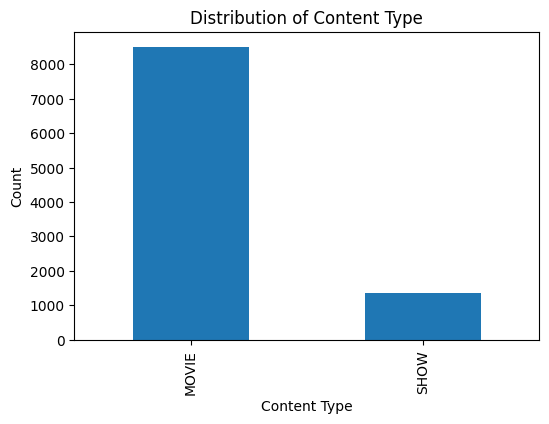

In [45]:
# Chart - 1 visualization code
titles_df_clean['type'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Distribution of Content Type")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Count plots clearly compare categorical frequencies.

##### 2. What is/are the insight(s) found from the chart?

Movies dominate the catalog compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps decide whether to invest more in series (retention-driven) or movies (acquisition-driven).
Lower TV show count may reduce long-term subscriber retention.


#### Chart - 2

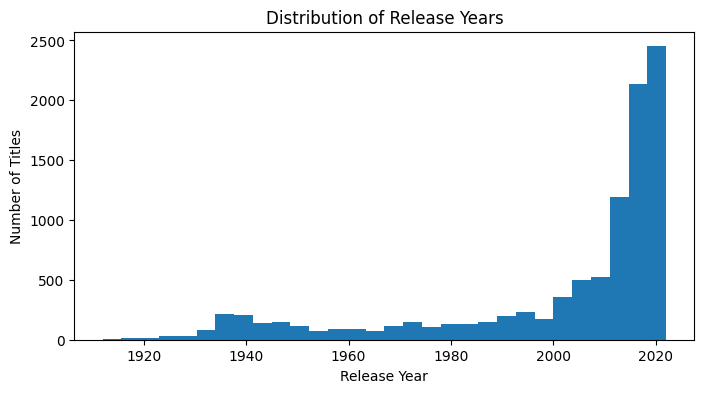

In [62]:
# Chart - 2 visualization code
plt.figure(figsize=(8,4))
plt.hist(titles_df_clean['release_year'], bins=30)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

##### 1. Why did you pick the specific chart?

Histogram shows temporal concentration.

##### 2. What is/are the insight(s) found from the chart?

Sharp rise in content after 2010.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Shows aggressive recent content expansion.
Older content underrepresented → limited nostalgia catalog.

#### Chart - 3

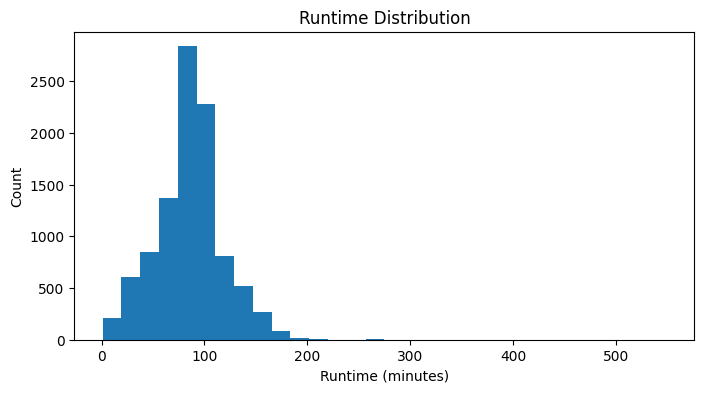

In [48]:
# Chart - 3 visualization code
plt.figure(figsize=(8,4))
plt.hist(titles_df_clean['runtime'], bins=30)
plt.title("Runtime Distribution")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Identifies typical content length.

##### 2. What is/are the insight(s) found from the chart?

Most titles are between 60–120 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Aligns with viewer preference for moderate-length content.
Very long runtimes may reduce completion rates.

#### Chart - 4

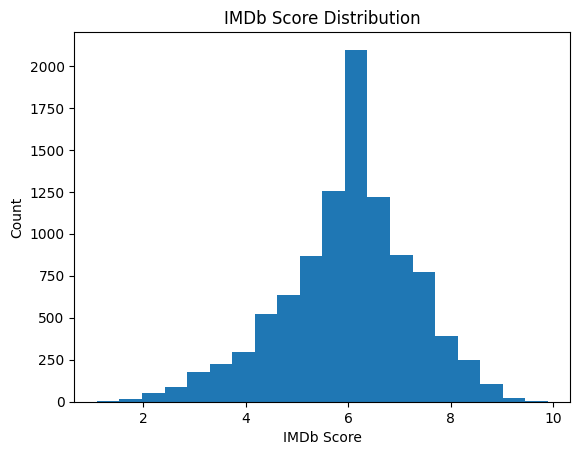

In [49]:
# Chart - 4 visualization code
plt.hist(titles_df_clean['imdb_score'], bins=20)
plt.title("IMDb Score Distribution")
plt.xlabel("IMDb Score")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Shows audience rating spread.

##### 2. What is/are the insight(s) found from the chart?

Ratings cluster around 5–7.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Average quality perception; room to invest in higher-rated originals.
Few very high-rated titles → brand quality risk.

#### Chart - 5

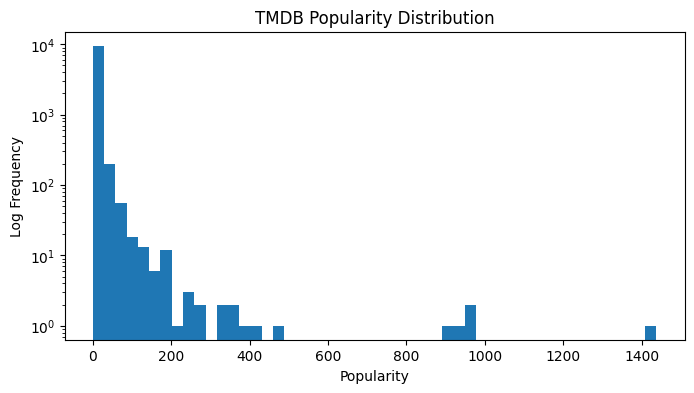

In [50]:
# Chart - 5 visualization code
plt.figure(figsize=(8,4))
plt.hist(titles_df_clean['tmdb_popularity'], bins=50)
plt.yscale('log')
plt.title("TMDB Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Log Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

Handles extreme skewness.

##### 2. What is/are the insight(s) found from the chart?

Very few titles drive most popularity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Blockbuster titles are key growth drivers.
Over-reliance on few hits is risky.

#### Chart - 6

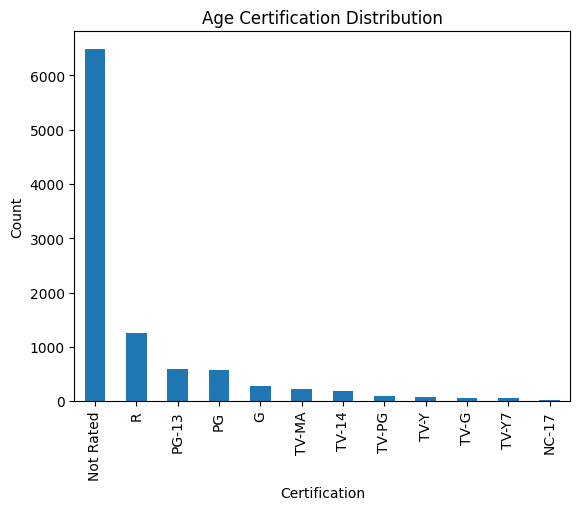

In [51]:
# Chart - 6 visualization code
titles_df_clean['age_certification'].value_counts().plot(kind='bar')
plt.title("Age Certification Distribution")
plt.xlabel("Certification")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Shows target audience focus.

##### 2. What is/are the insight(s) found from the chart?

Large amount of unrated and adult content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Supports diverse demographics.
Weak kids/family segmentation.

#### Chart - 7

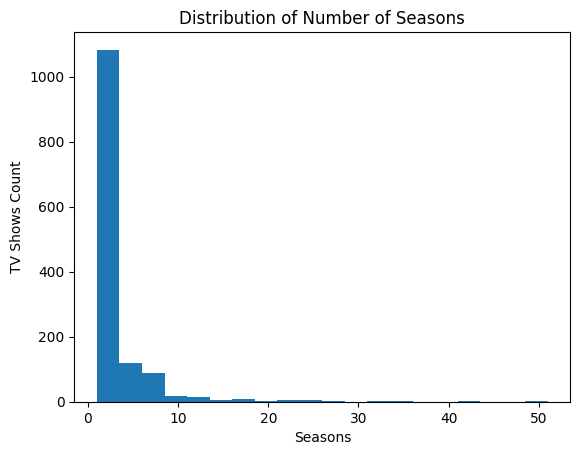

In [64]:
titles_df_clean[titles_df_clean['seasons'] > 0]['seasons'].plot(kind='hist', bins=20)
plt.title("Distribution of Number of Seasons")
plt.xlabel("Seasons")
plt.ylabel("TV Shows Count")
plt.show()

##### 1. Why did you pick the specific chart?

Highlights TV show longevity.

##### 2. What is/are the insight(s) found from the chart?

Most shows have 1–3 seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Short series reduce long-term retention.
Low multi-season continuity.

#### Chart - 8

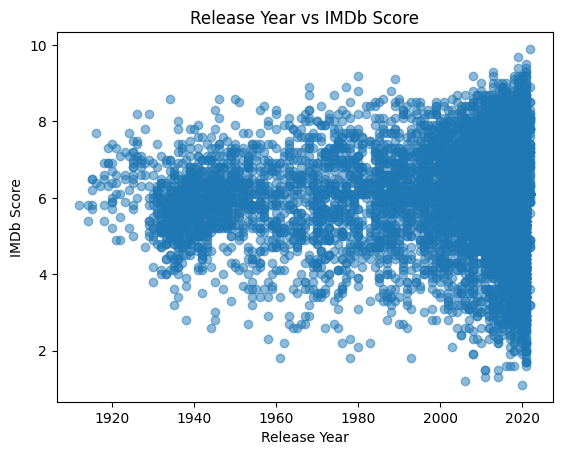

In [66]:
# Chart - 8 visualization code
plt.scatter(titles_df_clean['release_year'], titles_df_clean['imdb_score'], alpha=0.5)
plt.title("Release Year vs IMDb Score")
plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.show()

##### 1. Why did you pick the specific chart?

Evaluates content quality over time.

##### 2. What is/are the insight(s) found from the chart?

Older titles often have higher ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Classic content remains valuable.
Recent content quality inconsistency.

#### Chart - 9

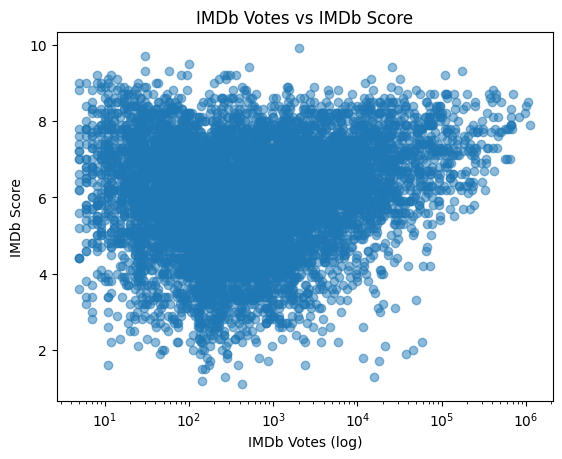

In [ ]:
plt.scatter(titles_df_clean['imdb_votes'], titles_df_clean['imdb_score'], alpha=0.5)
plt.xscale('log')
plt.title("IMDb Votes vs IMDb Score")
plt.xlabel("IMDb Votes (log)")
plt.ylabel("IMDb Score")
plt.show()

##### 1. Why did you pick the specific chart?

Popularity vs quality comparison.

##### 2. What is/are the insight(s) found from the chart?

High votes don’t always mean high ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Marketing ≠ content quality. Over-marketed low-quality content harms trust.

#### Chart - 10

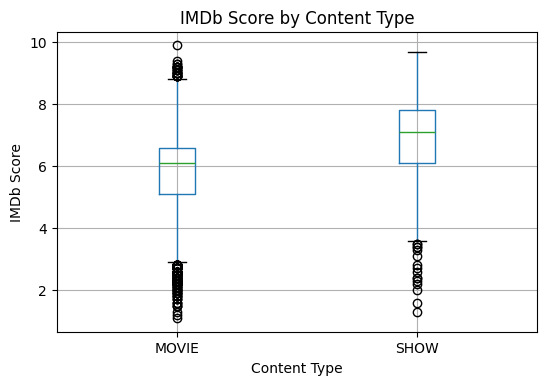

In [55]:
# Chart - 10 visualization code
titles_df_clean.boxplot(column='imdb_score', by='type', figsize=(6,4))
plt.title("IMDb Score by Content Type")
plt.suptitle("")
plt.xlabel("Content Type")
plt.ylabel("IMDb Score")
plt.show()

##### 1. Why did you pick the specific chart?

Compares distributions.

##### 2. What is/are the insight(s) found from the chart?

TV shows slightly outperform movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Supports investment in series.
Movie quality more volatile.

#### Chart - 11

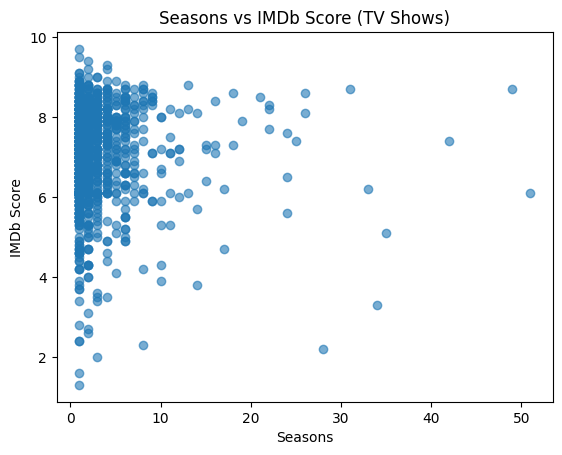

In [56]:
# Chart - 11 visualization code
tv = titles_df_clean[titles_df_clean['type'] == 'SHOW']
plt.scatter(tv['seasons'], tv['imdb_score'], alpha=0.6)
plt.title("Seasons vs IMDb Score (TV Shows)")
plt.xlabel("Seasons")
plt.ylabel("IMDb Score")
plt.show()


##### 1. Why did you pick the specific chart?

Analyzes longevity vs quality.

##### 2. What is/are the insight(s) found from the chart?

Higher-season shows often have better ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Encourage renewing successful series.Cancelling shows early loses potential value.

#### Chart - 12

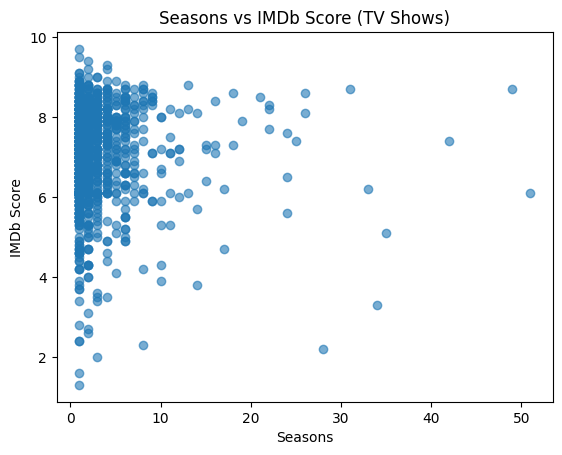

In [57]:
# Chart - 12 visualization code
tv = titles_df_clean[titles_df_clean['type'] == 'SHOW']
plt.scatter(tv['seasons'], tv['imdb_score'], alpha=0.6)
plt.title("Seasons vs IMDb Score (TV Shows)")
plt.xlabel("Seasons")
plt.ylabel("IMDb Score")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

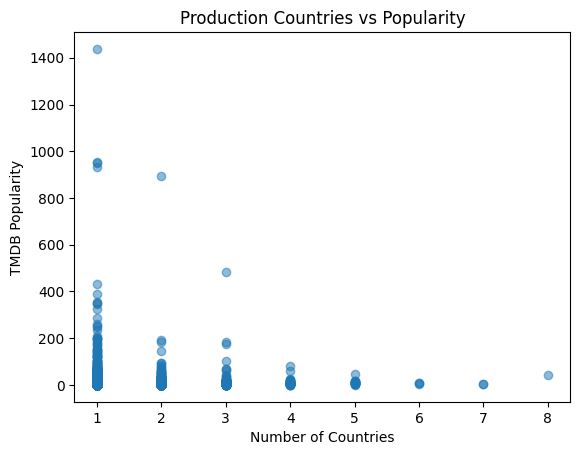

In [ ]:
# Chart - 13 visualization code
country_count = titles_df_clean['production_countries'].apply(lambda x: len(x.split(',')))
plt.scatter(country_count, titles_df_clean['tmdb_popularity'], alpha=0.5)
plt.title("Production Countries vs Popularity")
plt.xlabel("Number of Countries")
plt.ylabel("TMDB Popularity")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14

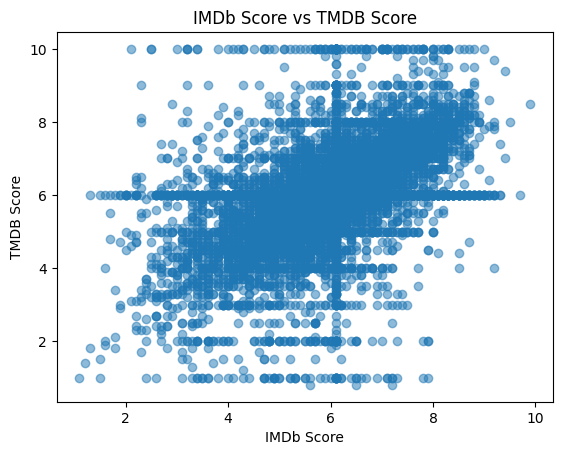

In [ ]:
# Correlation Heatmap visualization code
plt.scatter(titles_df_clean['imdb_score'], titles_df_clean['tmdb_score'], alpha=0.5)
plt.title("IMDb Score vs TMDB Score")
plt.xlabel("IMDb Score")
plt.ylabel("TMDB Score")
plt.show()

##### 1. Why did you pick the specific chart?

Correlation analysis

##### 2. What is/are the insight(s) found from the chart?

Strong positive relationship

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Answer Here

Ratings consistency improves trust.

#### Chart - 15

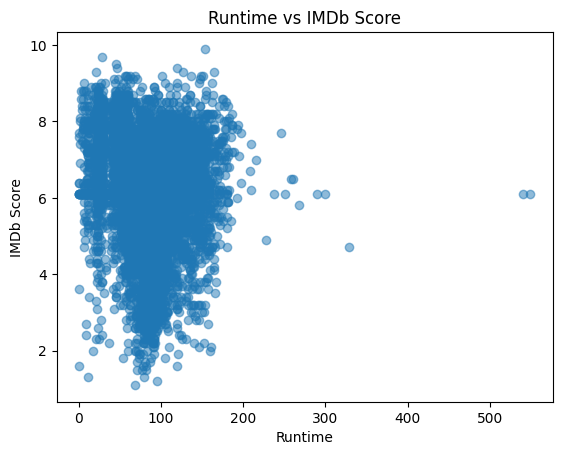

In [67]:
plt.scatter(titles_df_clean['runtime'], titles_df_clean['imdb_score'], alpha=0.5)
plt.title("Runtime vs IMDb Score")
plt.xlabel("Runtime")
plt.ylabel("IMDb Score")
plt.show()


1. Why did you pick the specific chart?

Checks if longer content performs better.

##### 2. What is/are the insight(s) found from the chart?

No strong correlation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Answer Here

Quality matters more than length.
Longer content doesn’t guarantee better ratings.

#### Chart - 16

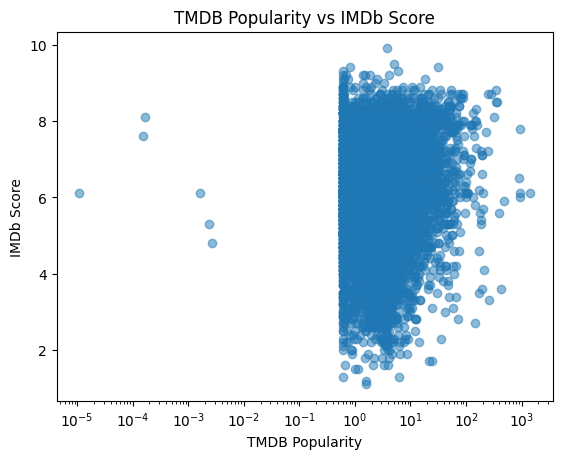

In [68]:
plt.scatter(titles_df_clean['tmdb_popularity'], titles_df_clean['imdb_score'], alpha=0.5)
plt.xscale('log')
plt.title("TMDB Popularity vs IMDb Score")
plt.xlabel("TMDB Popularity")
plt.ylabel("IMDb Score")
plt.show()

##### 1. Why did you pick the specific chart?

Final validation of popularity-quality link.

##### 2. What is/are the insight(s) found from the chart?

Weak correlation between popularity and ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Answer Here

Balance marketing with content quality.Chasing popularity alone is unsustainable.

#### Chart - 15 - Correlation Heatmap

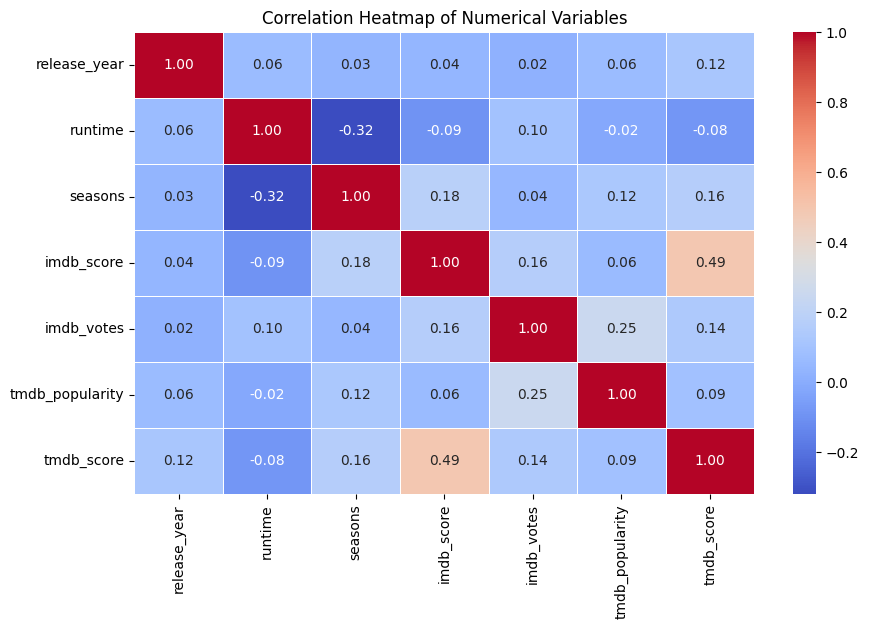

In [59]:
numerical_cols = [
    'release_year',
    'runtime',
    'seasons',
    'imdb_score',
    'imdb_votes',
    'tmdb_popularity',
    'tmdb_score'
]
corr_matrix = titles_df_clean[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

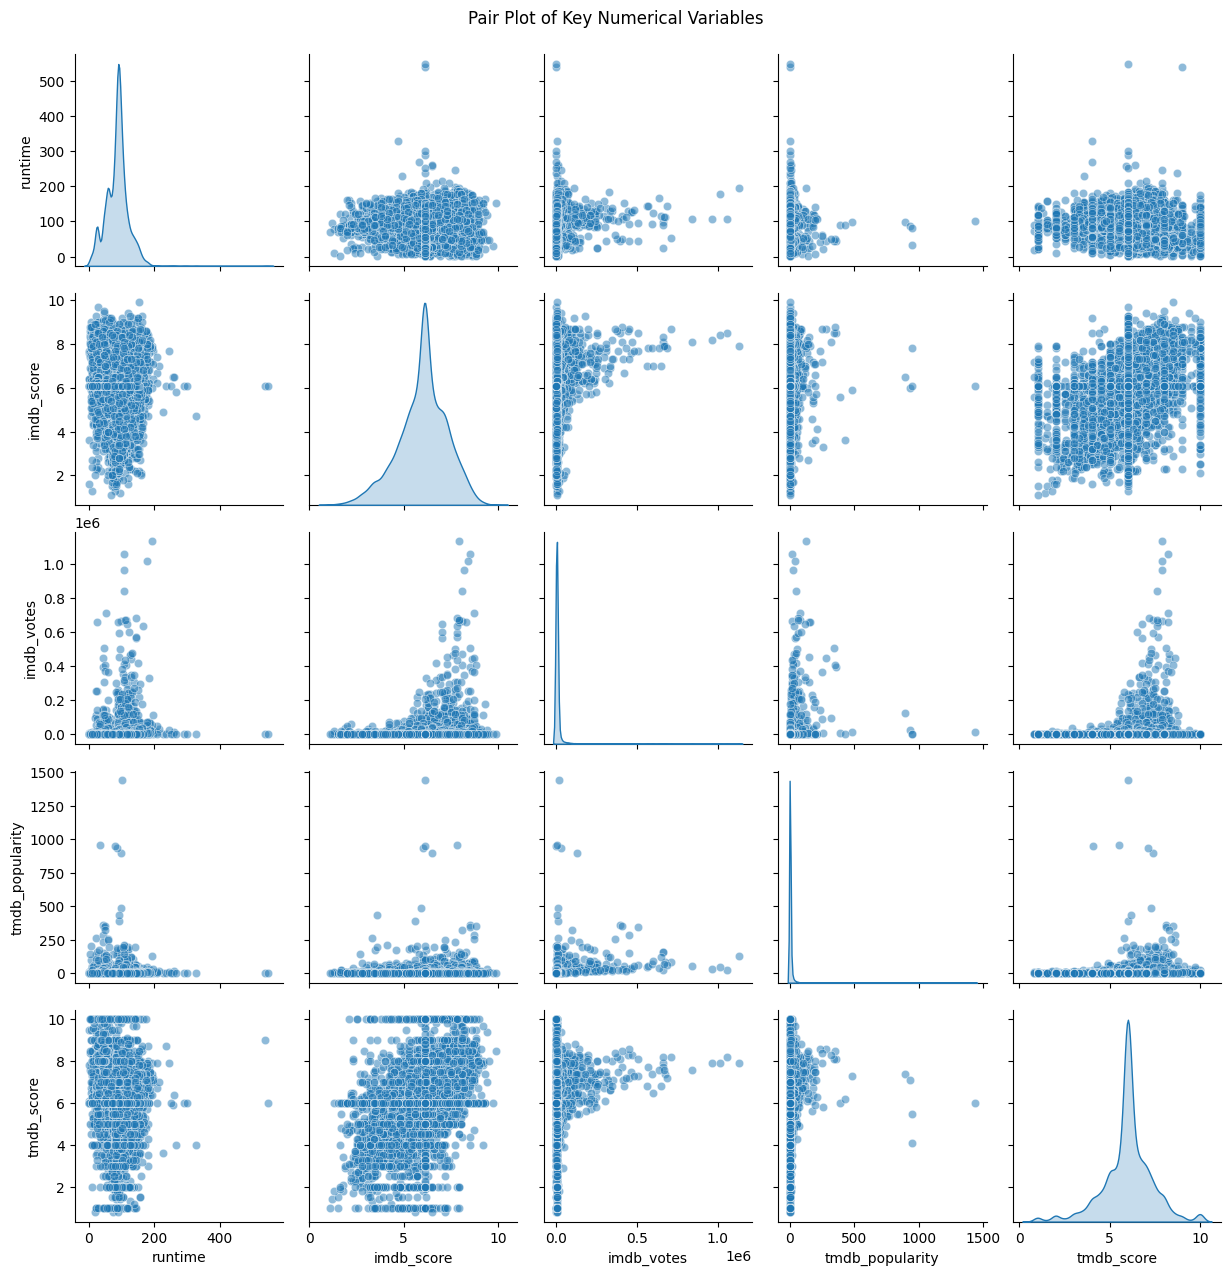

In [61]:
# Pair Plot visualization code
pairplot_cols = [
    'runtime',
    'imdb_score',
    'imdb_votes',
    'tmdb_popularity',
    'tmdb_score'
]
sns.pairplot(
    titles_df_clean[pairplot_cols],
    diag_kind='kde',
    plot_kws={'alpha': 0.5}
)
plt.suptitle("Pair Plot of Key Numerical Variables", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***